In [13]:
# Updated 2023/01/09
import numpy as np
import matplotlib.pyplot as plt

**Simple Plot**

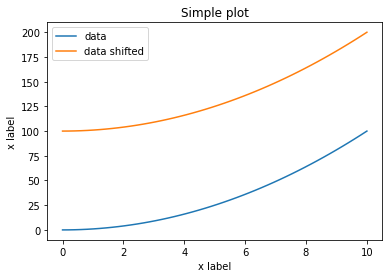

In [14]:
fig, ax = plt.subplots()

x = np.linspace(0,10)

ax.plot(x, x**2, label='data')
ax.plot(x, x**2+100, label='data shifted')

ax.set_xlabel('x label')
ax.set_ylabel('x label')
ax.set_title('Simple plot')

ax.legend()
# ax.grid()

plt.savefig('fig.png', bbox_inches='tight') # always save before show
plt.show()

**Colors**

**Markers**

**Subplots**

**Vertical and horizontal lines**

**Slider**